 Copyright (C)                                                       
 2016 - 2019 Pinard Liu(liujianping-ok@163.com) 
 
 https://www.cnblogs.com/pinard
 
 Permission given to modify the code as long as you keep this declaration at the top                               

用scikit-learn和pandas学习线性回归
https://www.cnblogs.com/pinard/p/6016029.html

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model

In [2]:
# read_csv里面的参数是csv在你电脑上的路径，此处csv文件放在notebook运行目录下面的CCPP目录里
data = pd.read_csv('.\CCPP\ccpp.csv')

In [3]:
#读取前五行数据，如果是最后五行，用data.tail()
data.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [4]:
data.tail()

,AT,V,AP,RH,PE
9563,15.12,48.92,1011.80,72.93,462.59
9564,33.41,77.95,1010.30,59.72,432.90
9565,15.99,43.34,1014.20,78.66,465.96
9566,17.65,59.87,1018.58,94.65,450.93
9567,23.68,51.30,1011.86,71.24,451.67


In [5]:
data.shape

(9568, 5)

In [6]:
X = data[['AT', 'V', 'AP', 'RH']]
X.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [7]:
y = data[['PE']]
y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


In [8]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

C:\Python27\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
print X_train.shape
print y_train.shape
print X_test.shape
print y_test.shape

(7176, 4)
(7176, 1)
(2392, 4)
(2392, 1)


In [10]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
print linreg.intercept_
print linreg.coef_

[ 447.06297099]
[[-1.97376045 -0.23229086  0.0693515  -0.15806957]]


In [12]:
#模型拟合测试集
y_pred = linreg.predict(X_test)
from sklearn import metrics
# 用scikit-learn计算MSE
print "MSE:",metrics.mean_squared_error(y_test, y_pred)
# 用scikit-learn计算RMSE
print "RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred))

MSE: 20.0804012021
RMSE: 4.48111606657


In [26]:
X = data[['AT', 'V', 'AP']]
y = data[['PE']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
#模型拟合测试集
y_pred = linreg.predict(X_test)
from sklearn import metrics
# 用scikit-learn计算MSE
print "MSE:",metrics.mean_squared_error(y_test, y_pred)
# 用scikit-learn计算RMSE
print "RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred))

MSE: 23.2089074701
RMSE: 4.81756239919


In [30]:
X = data[['AT', 'V', 'AP', 'RH']]
y = data[['PE']]
from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(linreg, X, y, cv=9)
# 用scikit-learn计算MSE
print "MSE:",metrics.mean_squared_error(y, predicted)
# 用scikit-learn计算RMSE
print "RMSE:",np.sqrt(metrics.mean_squared_error(y, predicted))

MSE: 20.7927937888
RMSE: 4.55991159879


C:\Python27\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


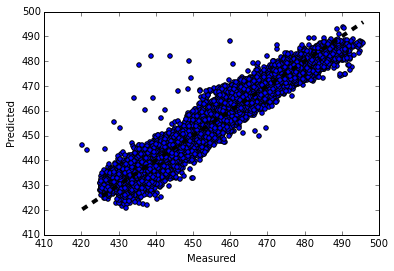

In [45]:
fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()